In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Лабораторная работа №2. Вариант №1.
## Илларионов Владислав 855

In [2]:
x = [1.7453e-1, 5.2360e-1, 8.7267e-1, 1.22173, 1.5708, 1.91986, 2.26893]
y = [1.6200e-3, 2.52e-3, 4.98e-3, 1.29e-2, 3.964e-2, 1.207e-1, 3.4097e-1]

## Находим коэффициенты полинома Ньютона $b_i$

In [3]:
n = len(y)
B = [y]
b = [y[0]]
for i in range(1, n):
    B.append([])
    for j in range(n - i):
        f_n = (B[i-1][j+1] - B[i-1][j])/(x[j+i] - x[j])
        B[i].append(f_n)
    b.append(B[i][0])

## Приводим к алгебраическому степенному виду

In [4]:
F = [[x[0], 1]]
for i in range(1, n):
    row = [F[i - 1][0] * x[i]]
    for j in range(1, i + 1):
        val = x[i] * F[i-1][j] + F[i-1][j-1]
        row.append(val)
    row.append(1)
    F.append(row)

In [5]:
M = [[b[0]]]
for i in range(1, n):
    row = []
    for j in range(i):
        val = M[i - 1][j] + (-1)**(i+j)*b[i]*F[i - 1][j]
        row.append(val)
    row.append(b[i])
    M.append(row)

p = np.array(M[-1][::-1])

## График полинома

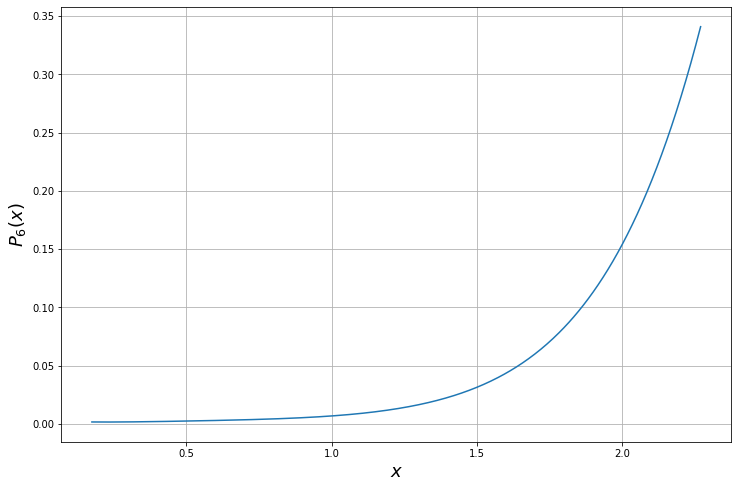

In [6]:
x_s = np.linspace(x[0], x[-1], 500)

plt.figure(figsize=(12, 8))
plt.plot(x_s, np.polyval(p, x_s))
plt.xlabel('$x$', fontsize=18)
plt.ylabel(f'$P_{len(x) - 1}(x)$', fontsize=18)
plt.grid()

## Построение элементов сплайна

In [7]:
def Si(i):
    P_i = np.polyval(p, x[i])
    P_i1 = np.polyval(p, x[i+1])
    
    p_d = np.polyder(p)
    dP_i = np.polyval(p_d, x[i])
    dP_i1 = np.polyval(p_d, x[i+1])
    
    a_3 = (dP_i1*(x[i+1] - x[i]) - 2*(y[i+1] - y[i]) + dP_i*(x[i+1] - x[i])) / (x[i+1] - x[i])**3
    a_2 = (-dP_i1*(x[i+1] - x[i])*(x[i+1] + 2*x[i]) + 3*(y[i+1] - y[i])*(x[i+1] + x[i])
           - dP_i*(x[i+1] - x[i])*(x[i] + 2*x[i+1])) / (x[i+1] - x[i])**3
    a_1 = (dP_i1*x[i]*(2*x[i+1] + x[i])*(x[i+1] - x[i]) - 6*(y[i+1] - y[i])*x[i]*x[i+1]
           + dP_i*x[i+1]*(x[i+1] + 2*x[i])*(x[i+1] - x[i])) / (x[i+1] - x[i])**3
    a_0 = (-dP_i1*(x[i]**2)*x[i+1]*(x[i+1] - x[i]) + y[i+1]*(x[i]**2)*(3*x[i+1] - x[i])
           + y[i]*(x[i+1]**2)*(x[i+1] - 3*x[i]) - dP_i*x[i]*(x[i+1]**2)*(x[i+1] - x[i])) / (x[i+1] - x[i])**3

    return np.array([a_3, a_2, a_1, a_0])

In [8]:
S = []
for i in range(len(x) - 1):
    S.append(Si(i))
S = np.array(S)

# Ответ

## Коэффициенты полинома Ньютона в степенном виде

In [9]:
for i, c in enumerate(p):
    print(f'x^{len(p) - i - 1} : {c}')

x^6 : 0.01117456557993848
x^5 : -0.04981625782491904
x^4 : 0.1094543433033508
x^3 : -0.1227016196709355
x^2 : 0.07479615193127234
x^1 : -0.019391458207426944
x^0 : 0.003284559824898437


## Коэффициенты сплайнов

In [10]:
df = pd.DataFrame(S, columns=['$1$', '$x$', '$x^2$', '$x^3$'])
df

,$1$,$x$,$x^2$,$x^3$
0,-0.022678,0.034019,-0.012191,0.002832
1,0.016016,-0.024260,0.017013,-0.002036
2,0.047379,-0.107846,0.091248,-0.024006
3,0.128445,-0.410429,0.467594,-0.179988
4,0.316247,-1.304870,1.887412,-0.931170
5,0.667820,-3.343208,5.826512,-3.468505


## Тестовая задача

In [11]:
t = 2
for i, xi in enumerate(x):
    if t <= xi:
        break
print(f'S_{i}({t}) = {np.polyval(S[i-1], t)}')
print(f'P({t}) = {np.polyval(p, t)}')

S_6(2) = 0.15424829604599877
P(2) = 0.1543947333399162


## Построим на одном графике полином Ньютона и получившийся сплайн

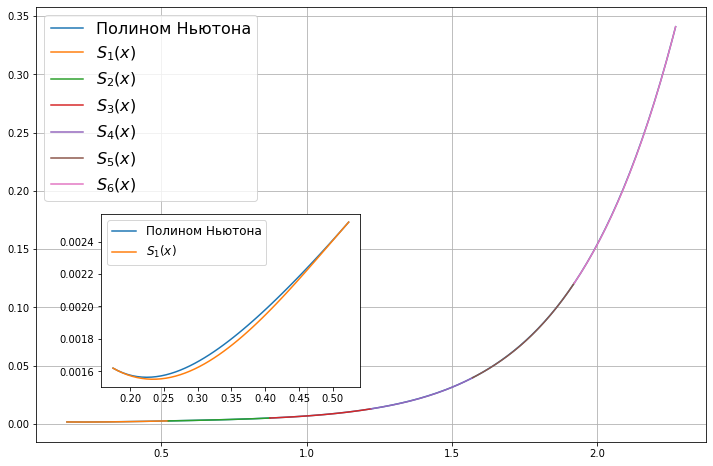

In [48]:
x_p = np.linspace(x[0], x[-1], 200)
x_s = []
for i in range(1, len(x)):
    x_s.append(np.linspace(x[i-1], x[i], 50))

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x_p, np.polyval(p, x_p), label='Полином Ньютона')
for i in range(len(x)-1):
    ax.plot(x_s[i], np.polyval(S[i], x_s[i]), label=f'$S_{i+1}(x)$')
    
ax.legend(fontsize=16)
ax.grid()

ax1 = plt.axes([0.2, 0.22, 0.3, 0.3])
ax1.plot(x_s[0], np.polyval(p, x_s[0]), label='Полином Ньютона')
ax1.plot(x_s[0], np.polyval(S[0], x_s[0]), label=f'$S_1(x)$')
ax1.legend(fontsize=12)